In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the CSV file
df = pd.read_csv("historical_automobile_sales.csv")

# Preview data
df.head()


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [3]:
'''Q1: Line chart – Automobile sales trend year by year (Pandas)
Objective

Show how automobile sales fluctuate from year to year

 Step 1: Group sales by Year

We calculate average sales per year'''

yearly_sales = df.groupby("Year")["Automobile_Sales"].mean()
yearly_sales 


Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
1985    3176.133333
1986    2341.133333
1987    2288.166667
1988    3074.500000
1989    3247.608333
1990     917.275000
1991     655.891667
1992    1647.700000
1993    2023.250000
1994    2554.825000
1995    4300.250000
1996    2295.208333
1997    2790.241667
1998    2994.891667
1999    2562.683333
2000    1286.791667
2001     692.133333
2002    1783.216667
2003    2628.991667
2004    3148.883333
2005    3076.566667
2006    2557.650000
2007    2727.166667
2008    1289.550000
2009     631.691667
2010    2308.600000
2011    3326.300000
2012    2782.216667
2013    2480.583333
2014    3362.908333
2015    3352.233333
2016    2805.803333
2017    2525.816667
2018    3180.608333
2019    2793.733333
2020    2355.166667
2021    3116.041667
2022    2044.141667
2023    2587.933333
Name: Automobile_Sales, dtype: float64

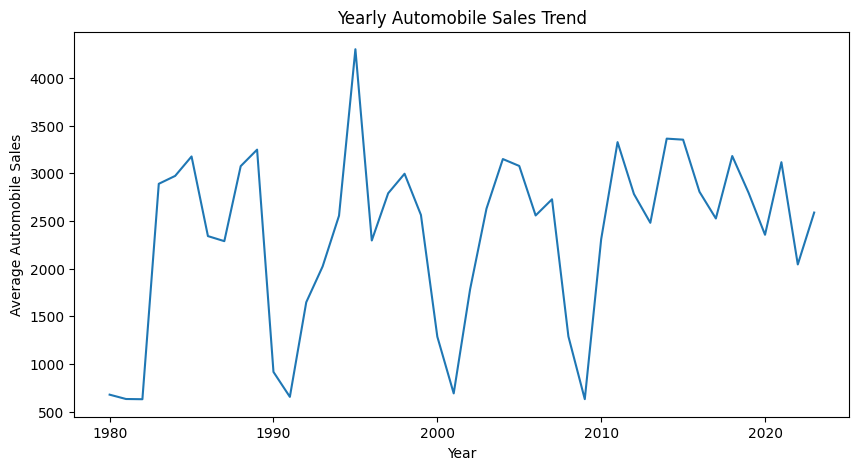

In [4]:
#Plot line chart using Pandas

yearly_sales.plot(
    kind='line',
    figsize=(10,5),
    title="Yearly Automobile Sales Trend",
    ylabel="Average Automobile Sales",
    xlabel="Year"
)

plt.show()


In [5]:
'''Q2: Line chart by Vehicle Type & Recession trend analysis
🔸 Objective

Plot different lines for each vehicle type
Analyze if trends differ during recession periods'''

#Step 1: Group by Year & Vehicle Type

vehicle_yearly_sales = df.groupby(
    ["Year", "Vehicle_Type"]
)["Automobile_Sales"].mean().reset_index()

vehicle_yearly_sales





,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,720.625000
1,1980,Smallfamiliycar,695.233333
2,1980,Supperminicar,635.840000
3,1981,Mediumfamilycar,628.400000
4,1981,Smallfamiliycar,638.420000
...,...,...,...
182,2022,Sports,1532.166667
183,2023,Executivecar,1579.600000
184,2023,Smallfamiliycar,2131.700000
185,2023,Sports,3100.250000


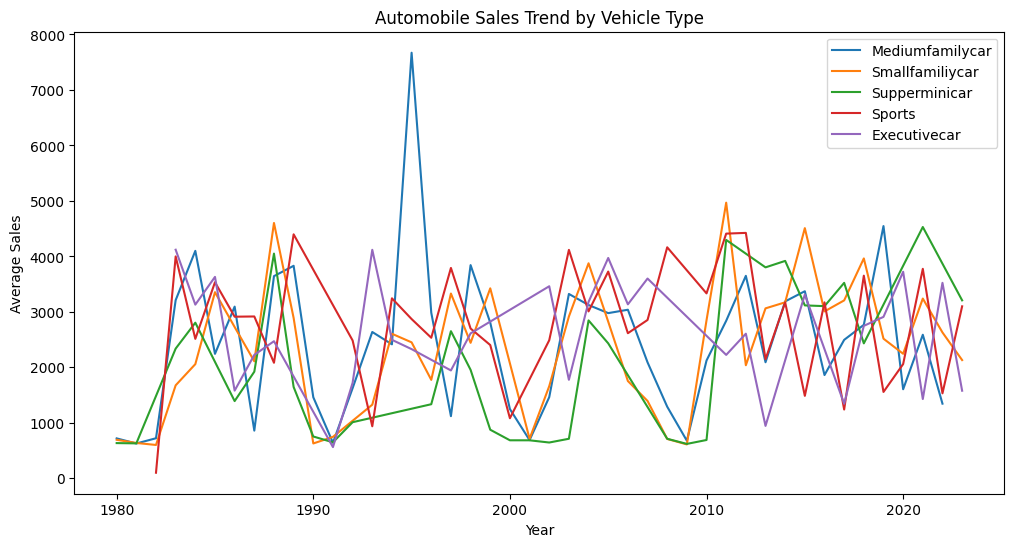

In [6]:
#Step 2: Plot multiple lines

plt.figure(figsize=(12,6))

for vehicle in vehicle_yearly_sales["Vehicle_Type"].unique():
    data = vehicle_yearly_sales[
        vehicle_yearly_sales["Vehicle_Type"] == vehicle
    ]
    plt.plot(data["Year"], data["Automobile_Sales"], label=vehicle)

plt.title("Automobile Sales Trend by Vehicle Type")
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.legend()
plt.show()

In [7]:
'''Q3: Seaborn – Sales trend comparison (Recession vs Non-Recession)
🔸 Objective

Compare sales trend per vehicle type for:

Recession period

Non-recession period'''

df["Recession_Label"] = df["Recession"].map({
    1: "Recession",
    0: "Non-Recession"
})

df


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City,Recession_Label
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia,Recession
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York,Recession
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York,Recession
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois,Recession
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California,Recession
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York,Non-Recession
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California,Non-Recession
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California,Non-Recession
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia,Non-Recession


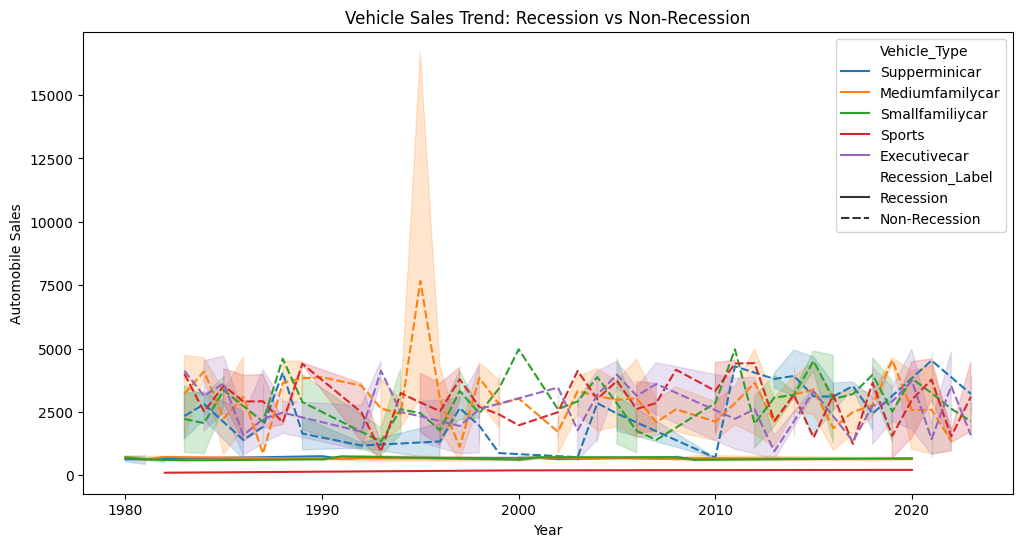

In [9]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data=df,
    x="Year",
    y="Automobile_Sales",
    hue="Vehicle_Type",
    style="Recession_Label"
)

plt.title("Vehicle Sales Trend: Recession vs Non-Recession")
plt.xlabel("Year")
plt.ylabel("Automobile Sales")
plt.show()



In [11]:
'''Q4: Bar chart – Compare vehicle sales in Recession vs Non-Recession
 Objective

Compare average sales of vehicle types during:

Recession

Non-recession'''

#Step 1: Group data

bar_data = df.groupby(
    ["Recession_Label", "Vehicle_Type"]
)["Automobile_Sales"].mean().reset_index()
bar_data

,Recession_Label,Vehicle_Type,Automobile_Sales
0,Non-Recession,Executivecar,2686.436232
1,Non-Recession,Mediumfamilycar,2981.501935
2,Non-Recession,Smallfamiliycar,2752.658140
3,Non-Recession,Sports,2910.636264
4,Non-Recession,Supperminicar,2495.242222
5,Recession,Executivecar,564.000000
6,Recession,Mediumfamilycar,674.847619
7,Recession,Smallfamiliycar,650.733333
8,Recession,Sports,170.333333
9,Recession,Supperminicar,659.270968


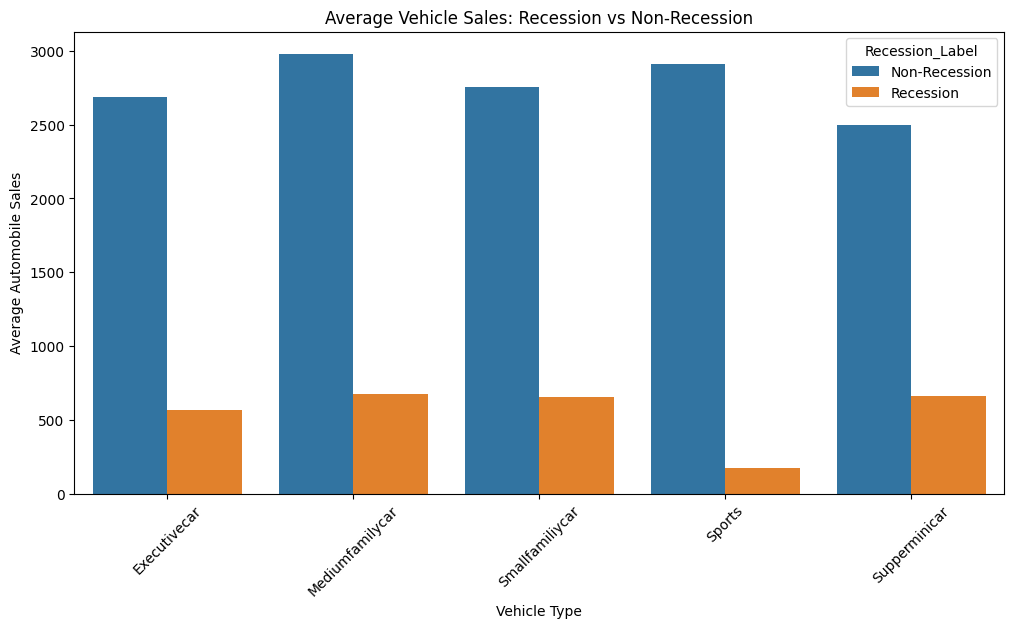

In [12]:
#Step 2: Seaborn Bar Plot
plt.figure(figsize=(12,6))

sns.barplot(
    data=bar_data,
    x="Vehicle_Type",
    y="Automobile_Sales",
    hue="Recession_Label"
)

plt.title("Average Vehicle Sales: Recession vs Non-Recession")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Automobile Sales")
plt.xticks(rotation=45)
plt.show()
